In [43]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image
from matplotlib.patches import Rectangle

# Task 3

The goal of this exercise is to segment object of a specified colour range in an RGB-image. This is done by classifying each RGB-pixes as having colour in this range or not. To make a decision we define a similarity measure $D$ between the RGB-vector $\mathrm{a}$ representing the colour that we wish to segment ($\mathrm{a} = [a_R, a_G, a_B]$ where $a_R$, $a_G$, $a_B$ are the red, green and blue components respectively) and the RGB-vector of the pixel to be examined $\mathrm{z}$:

(Eq. 1)
$$
D(\mathrm{a}, \mathrm{z}) = \left[(\mathrm{z}-\mathrm{a})^TC^{-1}(\mathrm{z}-\mathrm{a})\right]^{\frac{1}{2}},
$$

where $C$ is the covariance matrix representing the variation of the colour that we wish to segment ($\mathrm{a}$ is obtained by averaging over a set of samples of the colour we wish to segment and $C$ is the covariance matrix based on the samples). If $D$ is smaller or equal than some threshold $D_0$, the pixel is classified as within the range. 


## a)

Use the image shown above (available on Canvas or can be downloaded from the book's website), and select a subregion in one of the strawberries. Based on the pixels in this subregion, compute the mean RGB-vector $\mathrm{a}$ and the covariance matrix $C$. 

## Solution

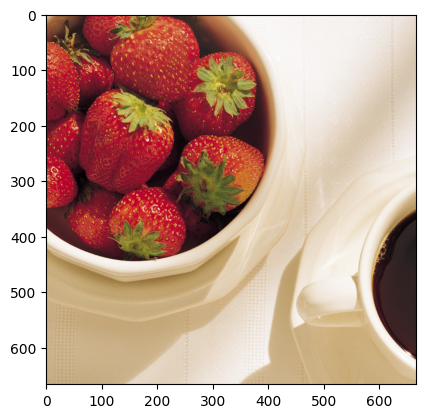

In [44]:
# Load the image
img = np.array(Image.open("strawberries.tif")) / 255
plt.imshow(img)
plt.show()

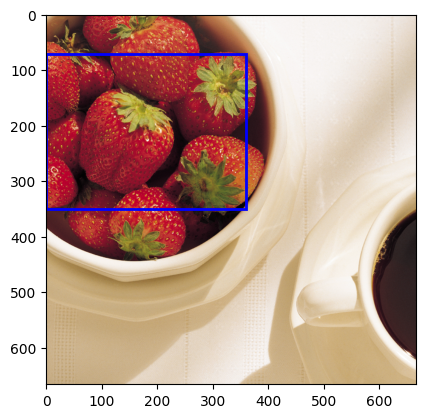

In [45]:
# Define region in the strawberries
bb = np.s_[70:350, 0:360]
strawberry_region = img[bb]

# Function to add rectangular patch to images
def add_patch(area, color='b', linewidth=2):
    # Extract the coordinates and dimensions from the slice
    x_start = area[0].start if area[0].start is not None else 0
    x_end = area[0].stop if area[0].stop is not None else 0
    y_start = area[1].start if area[1].start is not None else 0
    y_end = area[1].stop if area[1].stop is not None else 0
    width = y_end - y_start
    height = x_end - x_start

    rect = Rectangle((y_start, x_start), width, height, linewidth=linewidth, edgecolor=color, facecolor='none')
    return rect

rect = add_patch(bb)

plt.imshow(img)
plt.gca().add_patch(rect)
plt.show()

Text(0.5, 1.0, 'Strawberry Subregion')

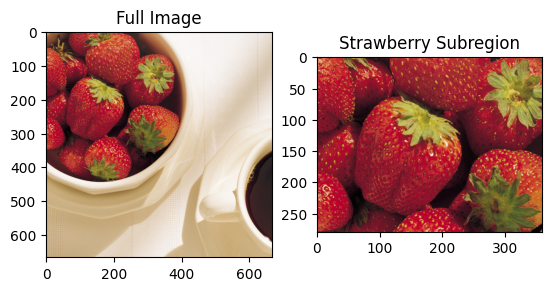

In [46]:
# We also plot the image and subregion for clarity
fig1,ax1 = plt.subplots(nrows=1, ncols=2)
ax1[0].imshow(img)
ax1[0].set_title("Full Image")
ax1[1].imshow(strawberry_region)
ax1[1].set_title("Strawberry Subregion")

In [47]:
# Then compute the mean and covariance of the colour vectors. 

# Reshape to list of colour vectors
region_vectors = strawberry_region.reshape(-1, 3).T
a = np.mean(region_vectors, axis=1)
cov = np.cov(region_vectors)


## b) 

Segment the strawberries in the image using Eq. 1 and $\mathrm{a}$ and $C$ computed in (a). The segmentation is performed by selecting the values in $D(\mathrm{z},\mathrm{a})$ that is below a given threshold $D_0$. Try using different values of $D_0$

Text(0.5, 1.0, 'D Map')

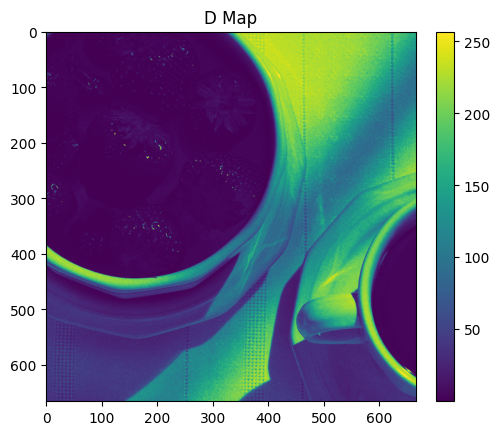

In [48]:
# We first need the inverse of the covariance matrix, this is used in Eq. 1
cov_inv = np.linalg.inv(cov)


D = np.einsum("ijc,cji->ij", (img-a) @ cov_inv, (img-a).T)
## Plot the D value for each pixel
fig2,ax2 = plt.subplots(1,1)
dmap_plot = ax2.imshow(D)
fig2.colorbar(dmap_plot, ax=ax2, fraction=0.046, pad=0.04)
ax2.set_title("D Map")

In [49]:
## Define a few thresholds for D0 and test them
def testD0(d_thresh):
    # Function that applies a D threshold to an image.
    seg_map = D<=d_thresh
    seg_im = img * seg_map[...,None]
    return seg_map, seg_im

D0 = [1,5,20,50]
segmentations = [testD0(d0_val) for d0_val in D0]

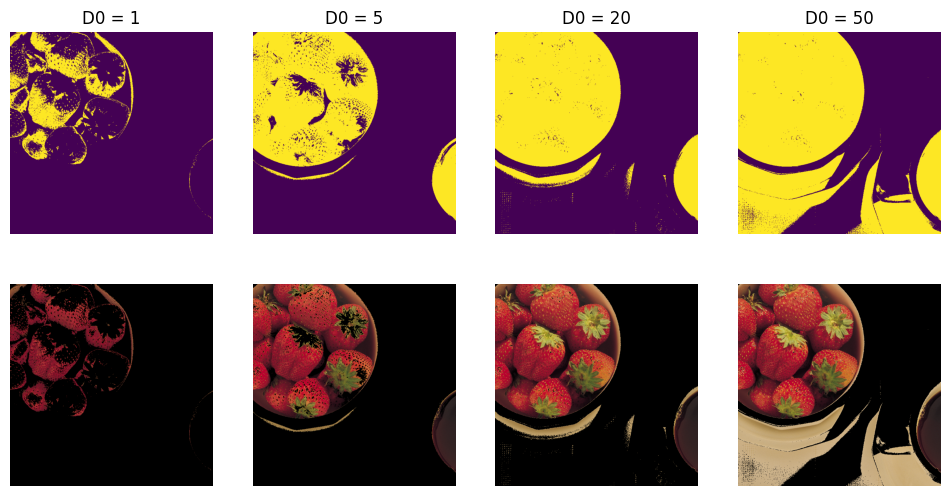

In [50]:
## Plot the segmentations
fig3,ax3 = plt.subplots(nrows=2, ncols=len(D0), figsize=(12,6))

for ix,seg in enumerate(segmentations):
    ax3[0,ix].imshow(seg[0])
    ax3[1,ix].imshow(seg[1])
    ax3[0,ix].set_title(f"D0 = {D0[ix]}")
ax2.set_axis_off()
for a in ax3.ravel():
    a.set_axis_off()
plt.show()
